# Ensemble model

In [70]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
import json
import pandas as pd
from datetime import datetime, timedelta
from copy import deepcopy

from modules.training_module import TrainingModule
from model_wrappers.model_factory import ModelFactory
from configs.base_config import TrainingModuleConfig

from nb_utils import train_eval, forecast, train_eval_plot
from nb_utils import plot_m1, plot_m2, plot_m3
from nb_utils import set_dates

### Load configs

In [108]:
with open('../config/sample_homogeneous_train_config.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

## Train-eval-plot step by step

### Set dates

In [73]:
current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

dates

{'train1_start_date': '6/1/20',
 'train1_end_date': '6/7/20',
 'train1_run_day': '5/31/20',
 'train2_start_date': '6/8/20',
 'train2_end_date': '6/15/20',
 'train2_run_day': '6/7/20',
 'test_start_date': '6/8/20',
 'test_end_date': '6/15/20',
 'test_run_day': '6/7/20'}

In [74]:
default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 10
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "../outputs/del-testing.json"

In [75]:
default_train_config

{'data_source': 'tracker_district_daily',
 'region_name': ['bengaluru urban'],
 'region_type': 'district',
 'train_start_date': '6/1/20',
 'train_end_date': '6/7/20',
 'model_class': 'homogeneous_ensemble',
 'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'}},
 'search_space': {'r0': [0.5, 3],
  'EbyCRatio': [0.001, 70],
  'IbyCRatio': [0.001, 2],
  'infectious_period': [1, 10],
  'F_hospitalization': [0, 0.125],
  'F_fatalities': [0.02, 0.12],
  'beta': [0, 2]},
 'search_parameters': {'max_evals': 10},
 'training_loss_function': {'metric_name': 'mape',
  'variable_weights': [{'variable': 'confirmed', 'weight': 0.25},
   {'variable': 'recovered', 'weight': 0.25},
   {'variable': 'deceased', 'weight': 0.25},
   {'variable': 'hospitalized', 'weight': 0.25}]},
 'loss_functions': [{'metric_name': 'mape',
   'variable_weights': [{'variable': 

In [76]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
     'r0': 2.058302737418627,
     'LatentEbyCRatio': {'6/10/20': 57.24504539983303,
      '6/20/20': 0.3503055147832431},
     'LatentIbyCRatio': {'6/10/20': 0.6853391013721378,
      '6/20/20': 0.09134310512001675}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 57.24504539983303,
     'F_fatalities': 0.02939840410615913,
     'F_hospitalization': 0.09255640493613826,
     'IbyCRatio': 0.6853391013721378,
     'infectious_period': 1.356269916680188,
  

In [77]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)

In [78]:
training_output = TrainingModule.from_config(train_config)

t = 7.90                                              
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
100%|██████████| 10/10 [00:00<00:00, 10.34trial/s, best loss: 102.61411678584038]
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90


In [79]:
training_output

{'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 66.12079772558069,
    'F_fatalities': 0.08492848025757575,
    'F_hospitalization': 0.10848406342849085,
    'IbyCRatio': 1.6051447726548582,
    'infectious_period': 4.169275822682925,
    'r0': 1.6748964822397392}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 2.0221185043663352,
     'F_fatalities': 0.045875618371995476,
     'F_hospitalization': 0.11558456395593145,
     'IbyCRatio': 1.5213903388186514,
     'infectious_period': 6.550533083001247,
     'r0': 2.549149974258314,
     'LatentEbyCRatio': {'5/31/20': 2.0221185043663352,
      '6/7/20': 1.590409942227555},
     'LatentIbyCRatio': {'5/31/20': 1.5213903388186514,
      '6/7/20': 0.12707918755988085}}},
   '

In [80]:
ensemble_train_config['model_parameters']['constituent_models'] = training_output['model_parameters']['constituent_models']

In [81]:
ensemble_train_config['model_parameters']['constituent_model_losses'] = training_output['model_parameters']['constituent_model_losses']

In [82]:
ensemble_train_config['model_parameters']['modes']['predict_mode'] = 'without_uncertainty'

In [83]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 2.0221185043663352,
     'F_fatalities': 0.045875618371995476,
     'F_hospitalization': 0.11558456395593145,
     'IbyCRatio': 1.5213903388186514,
     'infectious_period': 6.550533083001247,
     'r0': 2.549149974258314,
     'LatentEbyCRatio': {'5/31/20': 2.0221185043663352,
      '6/7/20': 1.590409942227555},
     'LatentIbyCRatio': {'5/31/20': 1.5213903388186514,
      '6/7/20': 0.12707918755988085}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 31.602870339643243,
     'F_fatalities': 0.05744649007926078,
     'F_hospitalization': 0.03863932122059119,
     'IbyCRatio': 0.5635687892716493,
     'infectious_period': 5.7231880092071075,


In [84]:
params, metrics, train1_model_params, train2_model_params = train_eval(['bengaluru urban'], 'district', 
                                                                       train1_start_date, train1_end_date, 
                                                                       train2_start_date, train2_end_date, train2_run_day,
                                                                       test_start_date, test_end_date,
                                                                       ensemble_train_config, ensemble_test_config,
                                                                       ensemble_forecast_config,
                                                                       max_evals=1, data_source='tracker_district_daily',
                                                                       mlflow_log=False, name_prefix="testing")

t = 7.90                                             
t = 7.90                                             
t = 7.90                                             
t = 7.90                                             
t = 7.90                                             
t = 7.90                                             
t = 7.90                                             
t = 7.90                                             
t = 7.90                                             
t = 7.90                                             
100%|██████████| 1/1 [00:00<00:00,  1.32trial/s, best loss: 102.61411678584038]
Best fit: {'beta': 0.39990881524255606}
Best Loss: 102.61411678584038
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90                                             
t = 8.90                                             
t = 8.90              

In [85]:
params

{'region': 'bengaluru urban',
 'region_type': 'district',
 'train1_start_date': '6/1/20',
 'train1_end_date': '6/7/20',
 'train2_start_date': '6/8/20',
 'train2_end_date': '6/15/20',
 'run_day': '6/7/20',
 'test_start_date': '6/8/20',
 'test_end_date': '6/15/20',
 'data_source': 'tracker_district_daily'}

In [86]:
metrics

{'Train1RMLSE': 0,
 'Train1MAPE': 410.4564671433615,
 'Train1_mape_confirmed': 85.56775385929556,
 'Train1_mape_confirmed_weight': 1.0,
 'Train1_mape_hospitalized': 25.43215319845012,
 'Train1_mape_hospitalized_weight': 1.0,
 'Train1_mape_recovered': 147.28921079704742,
 'Train1_mape_recovered_weight': 1.0,
 'Train1_mape_deceased': 152.1673492885684,
 'Train1_mape_deceased_weight': 1.0,
 'TestMAPE': 263.8381358305538,
 'TestRMLSE': 0,
 'Test_mape_confirmed': 16.654349062765316,
 'Test_mape_confirmed_weight': 1.0,
 'Test_mape_hospitalized': 75.86668638266644,
 'Test_mape_hospitalized_weight': 1.0,
 'Test_mape_recovered': 95.06567946734855,
 'Test_mape_recovered_weight': 1.0,
 'Test_mape_deceased': 23.483793751662724,
 'Test_mape_deceased_weight': 1.0,
 'Train2MAPE': 211.07050866444303,
 'Train2RMLSE': 0,
 'Train2_mape_confirmed': 16.654349062765316,
 'Train2_mape_confirmed_weight': 1.0,
 'Train2_mape_hospitalized': 75.86668638266644,
 'Train2_mape_hospitalized_weight': 1.0,
 'Train2_map

In [87]:
train1_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 2.0221185043663352,
     'F_fatalities': 0.045875618371995476,
     'F_hospitalization': 0.11558456395593145,
     'IbyCRatio': 1.5213903388186514,
     'infectious_period': 6.550533083001247,
     'r0': 2.549149974258314,
     'LatentEbyCRatio': {'5/31/20': 2.0221185043663352,
      '6/7/20': 1.590409942227555},
     'LatentIbyCRatio': {'5/31/20': 1.5213903388186514,
      '6/7/20': 0.12707918755988085}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 31.602870339643243,
     'F_fatalities': 0.05744649007926078,
     'F_hospitalization': 0.03863932122059119,
     'IbyCRatio': 0.5635687892716493,
     'infectiou

In [88]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 2.0221185043663352,
     'F_fatalities': 0.045875618371995476,
     'F_hospitalization': 0.11558456395593145,
     'IbyCRatio': 1.5213903388186514,
     'infectious_period': 6.550533083001247,
     'r0': 2.549149974258314,
     'LatentEbyCRatio': {'5/31/20': 2.0221185043663352,
      '6/7/20': 1.590409942227555},
     'LatentIbyCRatio': {'5/31/20': 1.5213903388186514,
      '6/7/20': 0.12707918755988085}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 31.602870339643243,
     'F_fatalities': 0.05744649007926078,
     'F_hospitalization': 0.03863932122059119,
     'IbyCRatio': 0.5635687892716493,
     'infectiou

In [89]:
forecast_start_date = '6/2/20'
forecast_length = 30
forecast_run_day = (datetime.strptime(forecast_start_date, "%m/%d/%y") - timedelta(days=1)).strftime("%-m/%-d/%y")
forecast_end_date = (datetime.strptime(forecast_start_date, "%m/%d/%y") + timedelta(days=forecast_length)).strftime("%-m/%-d/%y")

In [90]:
forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final
0,6/2/20,867.543036,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,619.620346,359.300722
1,6/3/20,1016.792634,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,706.730377,461.844780
2,6/4/20,1183.683564,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,810.483062,568.872590
3,6/5/20,1372.027813,5.552248,656.935493,31.586366,799.566813,111.044954,111.044954,932.800374,688.521859
4,6/6/20,1586.781322,6.368878,787.227140,37.850968,952.455664,127.377556,127.377556,1075.622089,825.078108
5,6/7/20,1834.390771,7.340968,937.064637,45.055362,1128.939355,146.819356,146.819356,1240.746028,982.120000
6,6/8/20,2119.803534,8.469370,1109.886536,53.364878,1332.638808,169.387394,169.387394,1431.681269,1163.251414
7,6/9/20,2448.407962,9.771637,1309.274128,62.951709,1567.658581,195.432745,195.432745,1652.623495,1372.225836
8,6/10/20,2827.141629,11.277785,1539.349587,74.014055,1838.919335,225.555693,225.555693,1908.119694,1613.363642
9,6/11/20,3264.359772,13.021258,1804.938642,86.783943,2152.147751,260.425166,260.425166,2203.175693,1891.722585


t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90


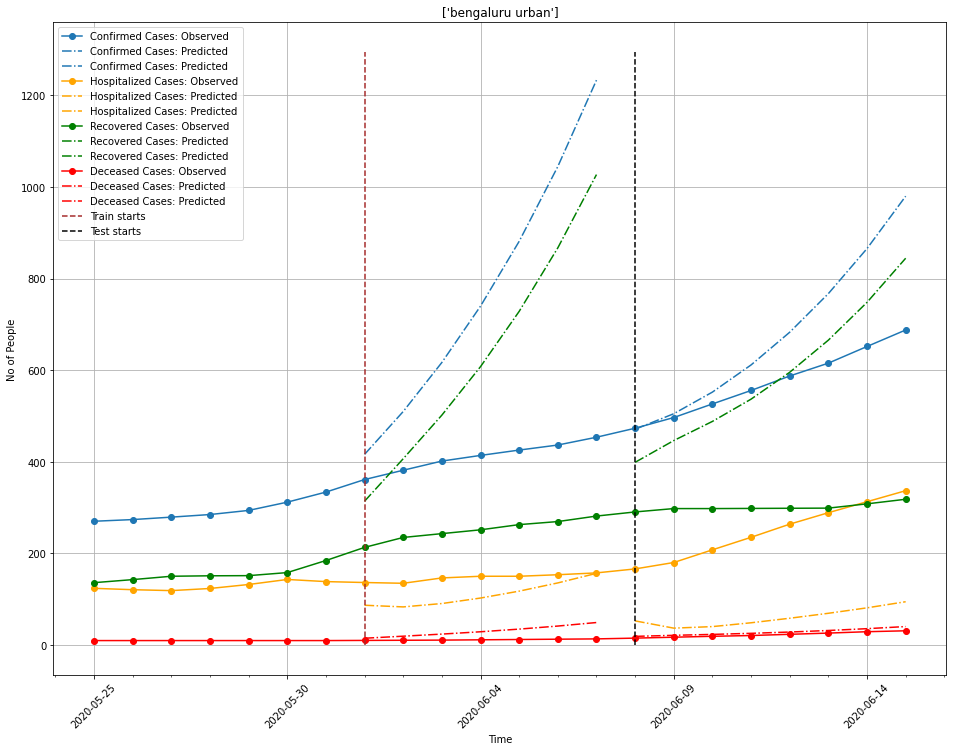

In [91]:
plot_m1(train1_model_params, train1_run_day, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, ensemble_forecast_config,
        rolling_average = False, uncertainty = False, 
        plot_config = 'plot_config.json', plot_name = 'm1.png')

t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90


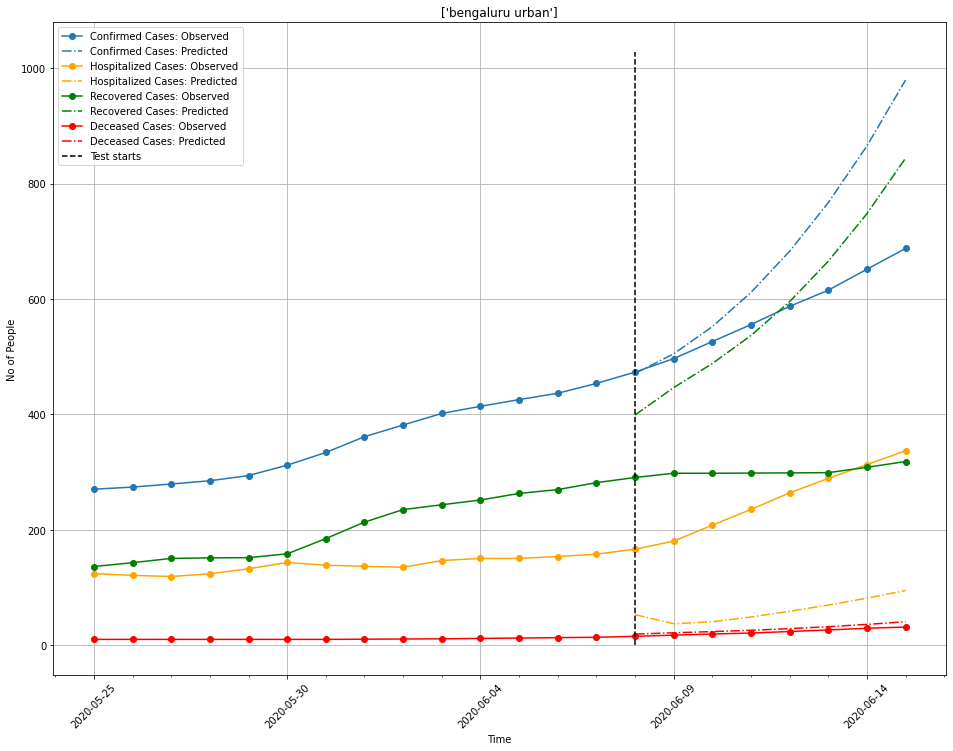

In [92]:
plot_m2(train2_model_params, train1_start_date, train1_end_date,
        test_run_day, test_start_date, test_end_date, ensemble_forecast_config,
        rolling_average = False, uncertainty = False, 
        plot_config = 'plot_config.json', plot_name = 'm2.png')

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


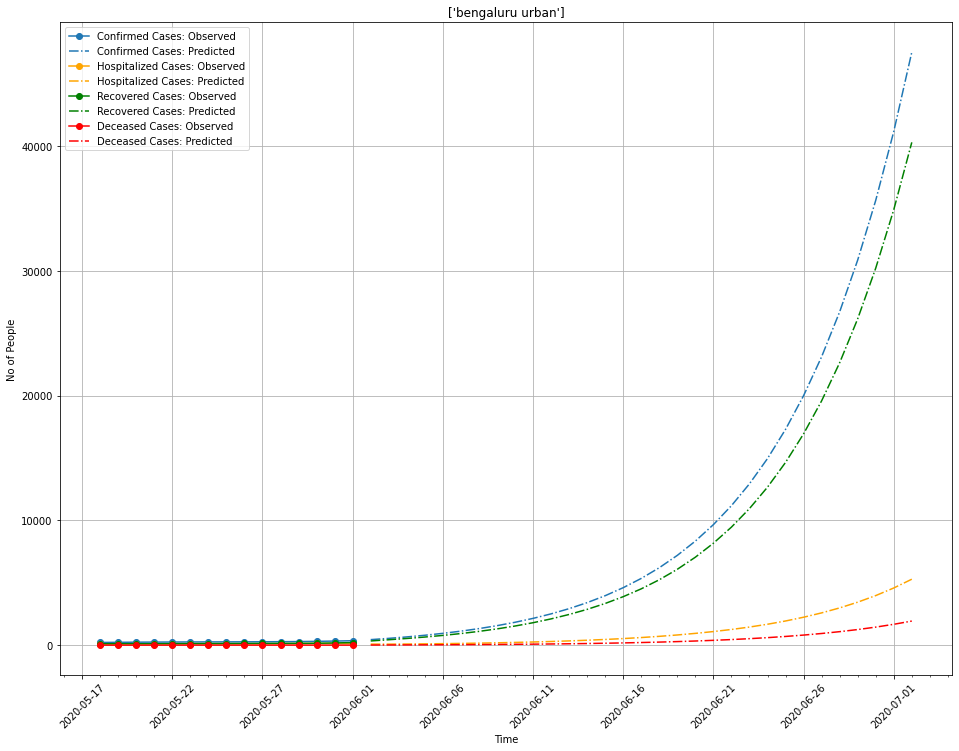

In [94]:
plot_m3(train2_model_params, train1_start_date, 
        forecast_start_date, forecast_length, ensemble_forecast_config,
        rolling_average = False, uncertainty = False,
        plot_config = 'plot_config.json', plot_name = 'm3.png')

In [95]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 2.0221185043663352,
     'F_fatalities': 0.045875618371995476,
     'F_hospitalization': 0.11558456395593145,
     'IbyCRatio': 1.5213903388186514,
     'infectious_period': 6.550533083001247,
     'r0': 2.549149974258314,
     'LatentEbyCRatio': {'5/31/20': 2.0221185043663352,
      '6/7/20': 1.590409942227555},
     'LatentIbyCRatio': {'5/31/20': 1.5213903388186514,
      '6/7/20': 0.12707918755988085}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 31.602870339643243,
     'F_fatalities': 0.05744649007926078,
     'F_hospitalization': 0.03863932122059119,
     'IbyCRatio': 0.5635687892716493,
     'infectiou

In [96]:
train2_model_params['model_parameters']['modes']['predict_mode'] = "with_uncertainty"

In [97]:
train2_model_params['model_parameters']['uncertainty_parameters'] = {
            "include_mean": "True",
            "percentiles": [10, 20, 30, 40, 50, 60, 70, 80, 90],
            "ci": [95, 99],
            "date_of_interest": "6/3/20",
            "column_of_interest": "hospitalized",
            "tolerance": 1
        }

In [98]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 2.0221185043663352,
     'F_fatalities': 0.045875618371995476,
     'F_hospitalization': 0.11558456395593145,
     'IbyCRatio': 1.5213903388186514,
     'infectious_period': 6.550533083001247,
     'r0': 2.549149974258314,
     'LatentEbyCRatio': {'5/31/20': 2.0221185043663352,
      '6/7/20': 1.590409942227555},
     'LatentIbyCRatio': {'5/31/20': 1.5213903388186514,
      '6/7/20': 0.12707918755988085}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 31.602870339643243,
     'F_fatalities': 0.05744649007926078,
     'F_hospitalization': 0.03863932122059119,
     'IbyCRatio': 0.5635687892716493,
     'infectiou

In [99]:
uncertainty_df = forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


In [100]:
pd.set_option("display.max_columns", None)
uncertainty_df

prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final,active_10,hospitalized_10,icu_10,recovered_10,deceased_10,confirmed_10,active_20,hospitalized_20,icu_20,recovered_20,deceased_20,confirmed_20,active_30,hospitalized_30,icu_30,recovered_30,deceased_30,confirmed_30,active_40,hospitalized_40,icu_40,recovered_40,deceased_40,confirmed_40,active_50,hospitalized_50,icu_50,recovered_50,deceased_50,confirmed_50,active_60,hospitalized_60,icu_60,recovered_60,deceased_60,confirmed_60,active_70,hospitalized_70,icu_70,recovered_70,deceased_70,confirmed_70,active_80,hospitalized_80,icu_80,recovered_80,deceased_80,confirmed_80,active_90,hospitalized_90,icu_90,recovered_90,deceased_90,confirmed_90,active_2.5,hospitalized_2.5,icu_2.5,recovered_2.5,deceased_2.5,confirmed_2.5,active_97.5,hospitalized_97.5,icu_97.5,recovered_97.5,deceased_97.5,confirmed_97.5,active_0.5,hospitalized_0.5,icu_0.5,recovered_0.5,deceased_0.5,confirmed_0.5,active_99.5,hospitalized_99.5,icu_99.5,recovered_99.5,deceased_99.5,confirmed_99.5
0,6/2/20,867.543036,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,619.620346,359.300722,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246,90.688525,90.688525,4.534426,342.817579,16.483143,449.989246
1,6/3/20,1016.792634,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,706.730377,461.844780,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849,89.191069,89.191069,4.459553,440.657365,21.187415,551.035849
2,6/4/20,1183.683564,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,810.483062,568.872590,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903,97.871313,97.871313,4.893566,542.775208,26.097382,666.743903
3,6/5/20,1372.027813,5.552248,656.935493,31.586366,799.566813,111.044954,111.044954,932.800374,688.521859,111.044954,111.044954,5.552248,656.935493,31.586366,799.566813,111.044954,111.044954,5.552248,656.935493,31.586366,79